# Коррекция яркости и цвета

## Линейная коррекция контраста

Гистограмма - график: 
* x - яркость пикселя
* y - количество пикселей

При делении пиксели масштабируются на [0, 128] например при делении на 2. Это вызывает падение контрастности.
Контрастность означает, что цвета принимают не полный набор значений, а лишь некоторый отрезок

In [1]:
from skimage.io import imread, imsave, imshow
from skimage import img_as_float, img_as_ubyte
import numpy as np

from matplotlib.pyplot import hist

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/rv/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['imsave', 'imshow', 'imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


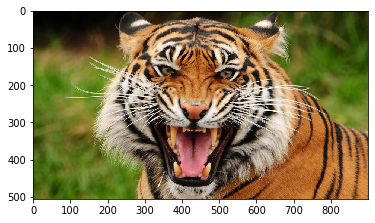

In [2]:
img = imread('data/1.tiger.jpg')
imshow(img)

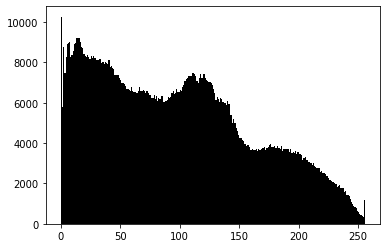

In [3]:
values, bin_edges, patches = hist(img.ravel(), bins=range(257), color='black')

### Автоконтраст изображения

In [4]:
img = (img / 2).astype('uint8')

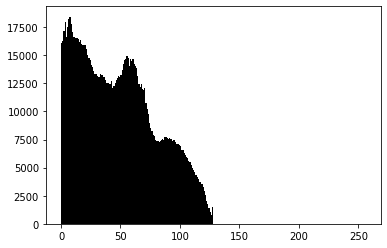

In [5]:
values, bin_edges, patches = hist(img.ravel(), bins=range(257), 
                                  color='black')

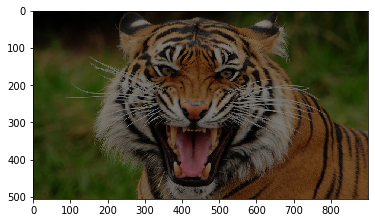

In [6]:
imshow(img)

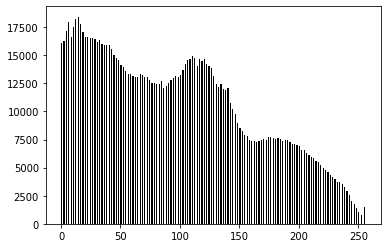

In [7]:
cor_img = ((img - img.min()) / (img.max() - img.min()) * 255).astype('uint8')
values, bin_edges, patches = hist(cor_img.ravel(), bins=range(257), 
                                  color='black')

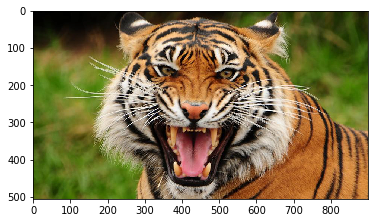

In [8]:
imshow(cor_img)

## Стабильный автоконтраст

При наличие очень ярких и очень темных пикселей на неконтрастной картинке,  автоконтраст выше работать не будет.

In [26]:
img = imread('data/3.tiger-low-contrast.png')

/home/rv/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


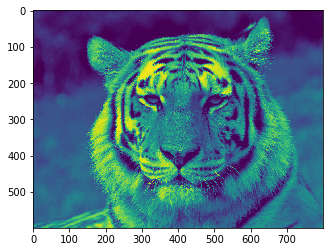

In [30]:
imshow(img_as_ubyte(img))

In [27]:
k = round(img.size * 0.05)
sort_ravel = sorted(img.ravel())

min_ = sort_ravel[k]
max_ = sort_ravel[img.size - k]

print(min_, max_)

0.5058824 0.8156863


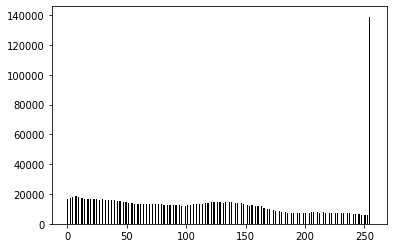

In [22]:
values, bin_edges, patches = hist(cor_img.ravel(), bins=range(257), 
                                  color='black')

In [18]:
img.astype('float')
cor_img = np.clip((img - min_) / (max_ - min_) * 255, 0, 255).astype('uint8')

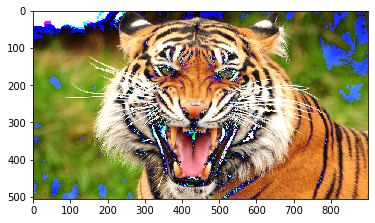

In [19]:
imshow(cor_img)

In [ ]:
max_

In [ ]:
img.astype('float')
cor_img = np.clip((img - min_) / (max_ - min_) * 255, 0, 255).astype('uint8')

In [ ]:
imshow((img - min_) / (max_ - min_) * 255)